In [1]:
import numpy as np
from matplotlib import pyplot as pl
from pathlib import Path
from importlib import reload

In [2]:
import orsr_modules as orsm
#reload(orsm)

In [3]:
aux = Path('luts/')
# mean spectral responses
SRFM = {'A':aux/'S3A_OL_SRF_20230331_mean_rsr.nc4',
        'B':aux/'S3B_OL_SRF_20230331_mean_rsr.nc4'}
# pixel specific spectral responses
SRFP = {'A':aux/'S3A_OL_SRF_20230331.nc4',
       'B':aux/'S3B_OL_SRF_20230331.nc4'}
# Temporal evolution database
TMOD = {'A':aux/'temporal_characterisation_olci_a_20230414.nc4',
        'B':aux/'temporal_characterisation_olci_b_20230414.nc4'}


In [4]:
sen3 = Path(
    'test_data/S3B_OL_1_ERR____20240518T081922_20240518T090347_20240518T203938_2665_093_121______PS2_O_NT_004.SEN3/'
)
sen3 = Path(
    'test_data/S3A_OL_1_ERR____20240518T103916_20240518T112341_20240519T111413_2665_112_265______PS1_O_NT_004.SEN3/'
)


In [5]:
olci = Path(sen3).name[2]
orbit = orsm.fn2orbit(sen3)
temp_model = orsm.temporal_model(TMOD[olci])
srfp_model = orsm.rsr_from_pixel(SRFP[olci])
srfm_model = orsm.rsr_from_mean(SRFM[olci])
orbit

42973

In [6]:
bnd = 1
didx = 123
cwl,fwhm = temp_model.cwl_and_fwhm_from_orbit(orbit,bnd,didx)


## Both:  the mean and the pixel-based RSR-LUTs result in similar bu not the same RSR

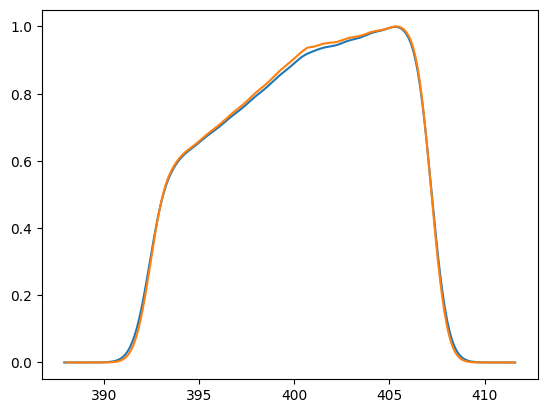

In [7]:
rsrm = srfm_model.calculate_rsr(bnd,cwl,fwhm)
rsrp = srfp_model.calculate_rsr(bnd,cwl,fwhm,didx)


pl.plot(rsrm[0],rsrm[1])
pl.plot(rsrp[0],rsrp[1])

## Band characteristic from instrument_data.nc and from temporal model are consistent

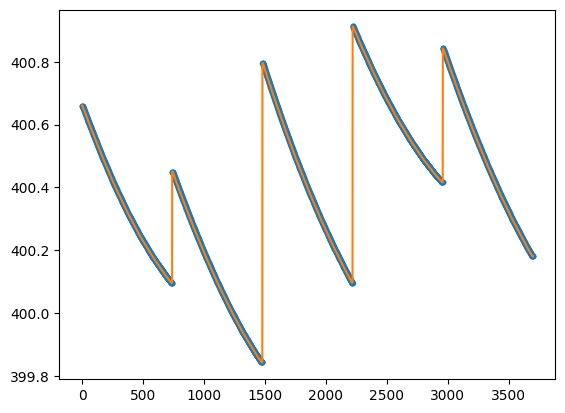

In [8]:
ccc = [temp_model.cwl_and_fwhm_from_orbit(orbit,bnd,i) for i in np.arange(0,3700)]
lll = [c[0] for c in ccc]
pl.plot(lll,'.')
#compare with what is deliverd in instrument data (should be the same)
#THIS IS NOT WORKING for collections < 4!!!!!!
ida = orsm.read_all_from_ncdf(sen3/'instrument_data.nc')
pl.plot(ida['lambda0'][bnd-1])

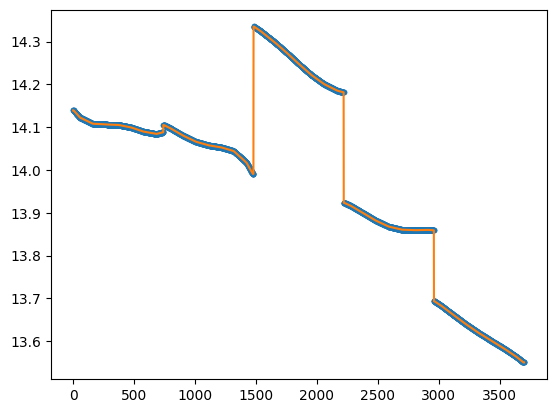

In [9]:
ccc = [temp_model.cwl_and_fwhm_from_orbit(orbit,bnd,i) for i in np.arange(0,3700)]
lll = [c[1] for c in ccc]
pl.plot(lll,'.')
pl.plot(ida['FWHM'][bnd-1])